In [1]:
!pip install python-binance
!pip install pandas
!pip install matplotlib
!pip install talib-binary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 1.2 MB/s 
     |████████████████████████████████| 288 kB 11.6 MB/s 
     |████████████████████████████████| 112 kB 44.3 MB/s 
     |████████████████████████████████| 749 kB 22.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.7 MB/s 


In [49]:
import pandas as pd 
import binance
import talib as ta
import matplotlib.pyplot as plt
client = binance.Client()
plt.style.use('dark_background')
last = float(client.futures_symbol_ticker(symbol= "BTCUSDT")["price"])
v1 = client.futures_klines(symbol= "ONTUSDT", interval = "5m", limit = 1200)
#ampl = float(v1[118][2]) - float (v1[118][3]) 
#chg = float(v1[118][1]) - float (v1[118][4])
v1d = pd.DataFrame(v1,  columns=['dateTime',
                                          'open',
                                          'high', 'low',
                                          'close', 'volume',
                                          'closeTime', 
                                          'quoteAssetVolume',
                                          'numberOfTrades', 
                                          'takerBuyBaseVol', 
                                          'takerBuyQuoteVol', 'ignore'])
v1d.open = pd.to_numeric(v1d["open"])
v1d.close = pd.to_numeric(v1d["close"])
v1d.high = pd.to_numeric(v1d["high"])
v1d.low = pd.to_numeric(v1d["low"])
v1d.volume = pd.to_numeric(v1d["volume"])
v1d.closeTime = pd.to_datetime(v1d["closeTime"], unit="ms")

pct = last/100


#real = PLUS_DI(high, low, close, timeperiod=14)

v1d["ampl"] = (v1d.high - v1d.low )#/pct
v1d["chg"] = abs(v1d.open - v1d.close)#/pct
v1d["pc7"] = v1d.chg.ewm(span = 7).mean()
v1d["plusd"] = ta.PLUS_DI(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["minusd"] = ta.MINUS_DI(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["adx"] = ta.ADX(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["cci"] = ta.CCI(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["bbup"], v1d["bbmed"], v1d["bbdown"] = ta.BBANDS(v1d.close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
v1d["roc"] = ta.ROC(v1d.close, timeperiod = 14)





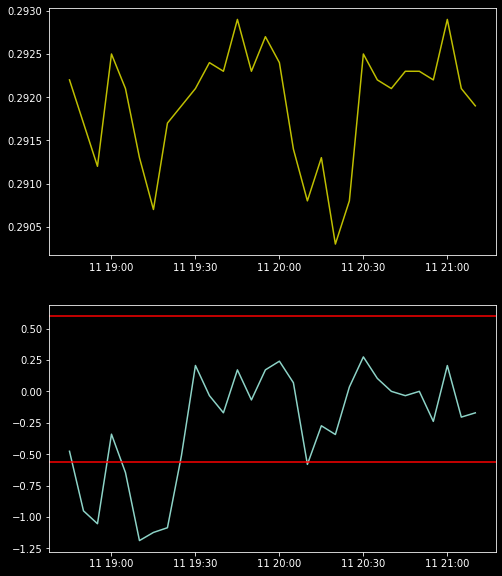

In [50]:

fig, ax = plt.subplots(2, figsize = (8,10))
ax[0].plot(v1d.closeTime.tail(30), v1d.close.tail(30), color= "y")
ax[1].plot(v1d.closeTime.tail(30), v1d.roc.tail(30))
#ax.plot(v1d.closeTime.tail(24), v1d.low.tail(24), color= "#FFA500")
#ax.plot(v1d.closeTime.tail(24), v1d.bbup.tail(24), color="r")
#ax.plot(v1d.closeTime.tail(24), v1d.bbdown.tail(24), color = "g")
#ax.plot(v1d.closeTime.tail(24), v1d.bbmed.tail(24), color = "b")
ax[1].axhline(y = 0.6 ,color = "r")
ax[1].axhline(y = -0.56 ,color = "r")


1199   -1.144748
Name: roc, dtype: float64